# Nicotine Addiction Analysis

Background: Nicotine is one of the most addicting agents has been said to be as addictive as cocaine and heroin. This substance interacts with the nicotinic acetyl chline receptors and stimulates dopamine transmission. This stimulation results in mood elevation and apparent improvement in cognitive function. However, nicotine has significant negative side effects such as insulin resistance, metabolic syndrome, and risk of diabetes. NAChRs by nicotine has also shown effects which are vital for the initiation and progression of cancer.

Goal: This machine learning analysis aims to identify those who are most at risk to becoming addcited to nicotine and the features which may influence nicotine addiction. 

Data: The data utilized from this project was from UCI's database and describes individuals based on their age, gender, use of drugs and more. 

Link to data: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified



# Understanding Data

Attribute Information
1. ID: is a number of records in an original database. Cannot be related to participant. It can be used for reference only.
2. Age (Real) is the age of partparticipant
3. Gender: Male or Female
4. Education: level of education of participant
5. Country: country of origin of the participant
6. Ethnicity: ethnicity of participant
6. Nscore (Real) is NEO-FFI-R Neuroticism
7. Escore (Real) is NEO-FFI-R Extraversion
8. Oscore (Real) is NEO-FFI-R Openness to experience.
9. Ascore (Real) is NEO-FFI-R Agreeableness.
10. Cscore (Real) is NEO-FFI-R Conscientiousness.
11. Impulsive (Real) is impulsiveness measured by BIS-11
12. SS (Real) is sensation seeing measured by ImpSS
13. Alcohol: alcohol consumption
14. Amphet: amphetamines consumption
15. Amyl: nitrite consumption
16. Benzos: benzodiazepine consumption
17. Caff: caffeine consumption
18. Cannabis: marijuana consumption
19. Choc: chocolate consumption
20. Coke: cocaine consumption
21. Crack: crack cocaine consumption
22. Ecstasy: ecstasy consumption
23. Heroin: heroin consumption
24. Ketamine: ketamine consumption
25. Legalh: legal highs consumption
26. LSD: LSD consumption
27. Meth: methadone consumption
28. Mushroom: magic mushroom consumption
29. Nicotine: nicotine consumption
30. Semer: class of fictitious drug Semeron consumption (i.e. control)
31. VSA: class of volatile substance abuse consumption
32. Alcohol: alcohol consumption

Ratings for Drug Use:

1. CL0 Never Used
2. CL1 Used over a Decade Ago
3. CL2 Used in Last Decade
4. CL3 Used in Last Year 59
5. CL4 Used in Last Month
6. CL5 Used in Last Week
7. CL6 Used in Last Day

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("drug_consumption.csv")

In [29]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [30]:
df.shape

(1885, 32)

In [31]:
df.info

<bound method DataFrame.info of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700

In [32]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730



# Data Cleaning

The business objective of the task is to find a model that can describe the factors that influence the consumption of nicotine based on personality, user characteristics, and consumption of other drugs. This will allow health officials and authorities to better understand and initiate precautionary measures to prevent consumption.

Data needs to be cleaned and reorganized to better purpose the machine learning models. Data not suited for the model and irrelevant to the analysis will be dropped.

In [33]:
df = df.dropna(axis='columns')

In [34]:
# Dropping overclaimer data
df = df.drop(data[data['Semer'] != 'CL0'].index)

NameError: name 'data' is not defined

In [35]:
# Dropping chococlate and control columns as they do not help with prediction
df = df.drop(['Choc'], axis=1)
df = df.drop(['Semer'],axis=1)
df = df.reset_index(drop=True)

In [36]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'],
      dtype='object')

# Assignment
Reassigning data to prepare for data splitting for the machine learning analysis

In [37]:
illegal_drugs = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA']

In [38]:
for drug in illegal_drugs:
    df[drug] = df[drug].str[2:]
    df[drug] = pd.to_numeric(df[drug])

In [39]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,2,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,2,0,2,3,0,4,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,2,0,0,0,0,2,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,1,0,0,1,0,0,2,2,0


In [40]:
df.corr()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,1.000000,-0.271395,-0.025467,-0.025253,-0.340751,0.059309,0.018639,-0.046960,0.173565,-0.028782,...,0.082169,0.167231,0.091180,0.074800,0.220806,0.215234,0.175429,0.202910,0.063197,0.101165
Age,-0.271395,1.000000,0.110286,0.158811,0.354241,-0.069753,-0.136654,-0.033849,-0.226778,0.063504,...,-0.051355,-0.384784,-0.121675,-0.220689,-0.419839,-0.323207,-0.191503,-0.331456,-0.248883,-0.229657
Gender,-0.025467,0.110286,1.000000,0.196774,0.216271,-0.001213,0.074646,0.057864,-0.131021,0.219743,...,-0.151324,-0.228574,-0.136728,-0.189825,-0.315676,-0.278983,-0.181489,-0.272431,-0.192084,-0.134852
Education,-0.025253,0.158811,0.196774,1.000000,0.225311,-0.036099,-0.100993,0.115645,0.057994,0.091088,...,-0.147743,-0.159819,-0.131051,-0.076479,-0.208656,-0.177817,-0.170103,-0.169762,-0.240547,-0.120540
Country,-0.340751,0.354241,0.216271,0.225311,1.000000,-0.127946,-0.136191,0.109524,-0.341969,0.150921,...,-0.229899,-0.336328,-0.300210,-0.112577,-0.426030,-0.498263,-0.413946,-0.490052,-0.277913,-0.267033
Ethnicity,0.059309,-0.069753,-0.001213,-0.036099,-0.127946,1.000000,0.047642,0.018402,0.084816,-0.038726,...,0.035478,0.071826,0.042881,0.031961,0.077511,0.129031,0.063805,0.115962,0.077724,0.087011
Nscore,0.018639,-0.136654,0.074646,-0.100993,-0.136191,0.047642,1.000000,-0.431051,0.010177,-0.216964,...,0.111435,0.069948,0.172685,0.062750,0.113342,0.037095,0.184672,0.042386,0.128430,0.115086
Escore,-0.046960,-0.033849,0.057864,0.115645,0.109524,0.018402,-0.431051,1.000000,0.245277,0.157336,...,-0.050969,0.078822,-0.079998,0.018727,-0.037383,0.018166,-0.121708,0.021105,-0.019196,-0.032910
Oscore,0.173565,-0.226778,-0.131021,0.057994,-0.341969,0.084816,0.010177,0.245277,1.000000,0.038516,...,0.097002,0.296306,0.134194,0.185061,0.317322,0.369759,0.171984,0.369139,0.195460,0.150502
Ascore,-0.028782,0.063504,0.219743,0.091088,0.150921,-0.038726,-0.216964,0.157336,0.038516,1.000000,...,-0.103945,-0.114550,-0.169886,-0.110763,-0.139983,-0.093888,-0.156847,-0.111424,-0.111075,-0.114083


<Axes: >

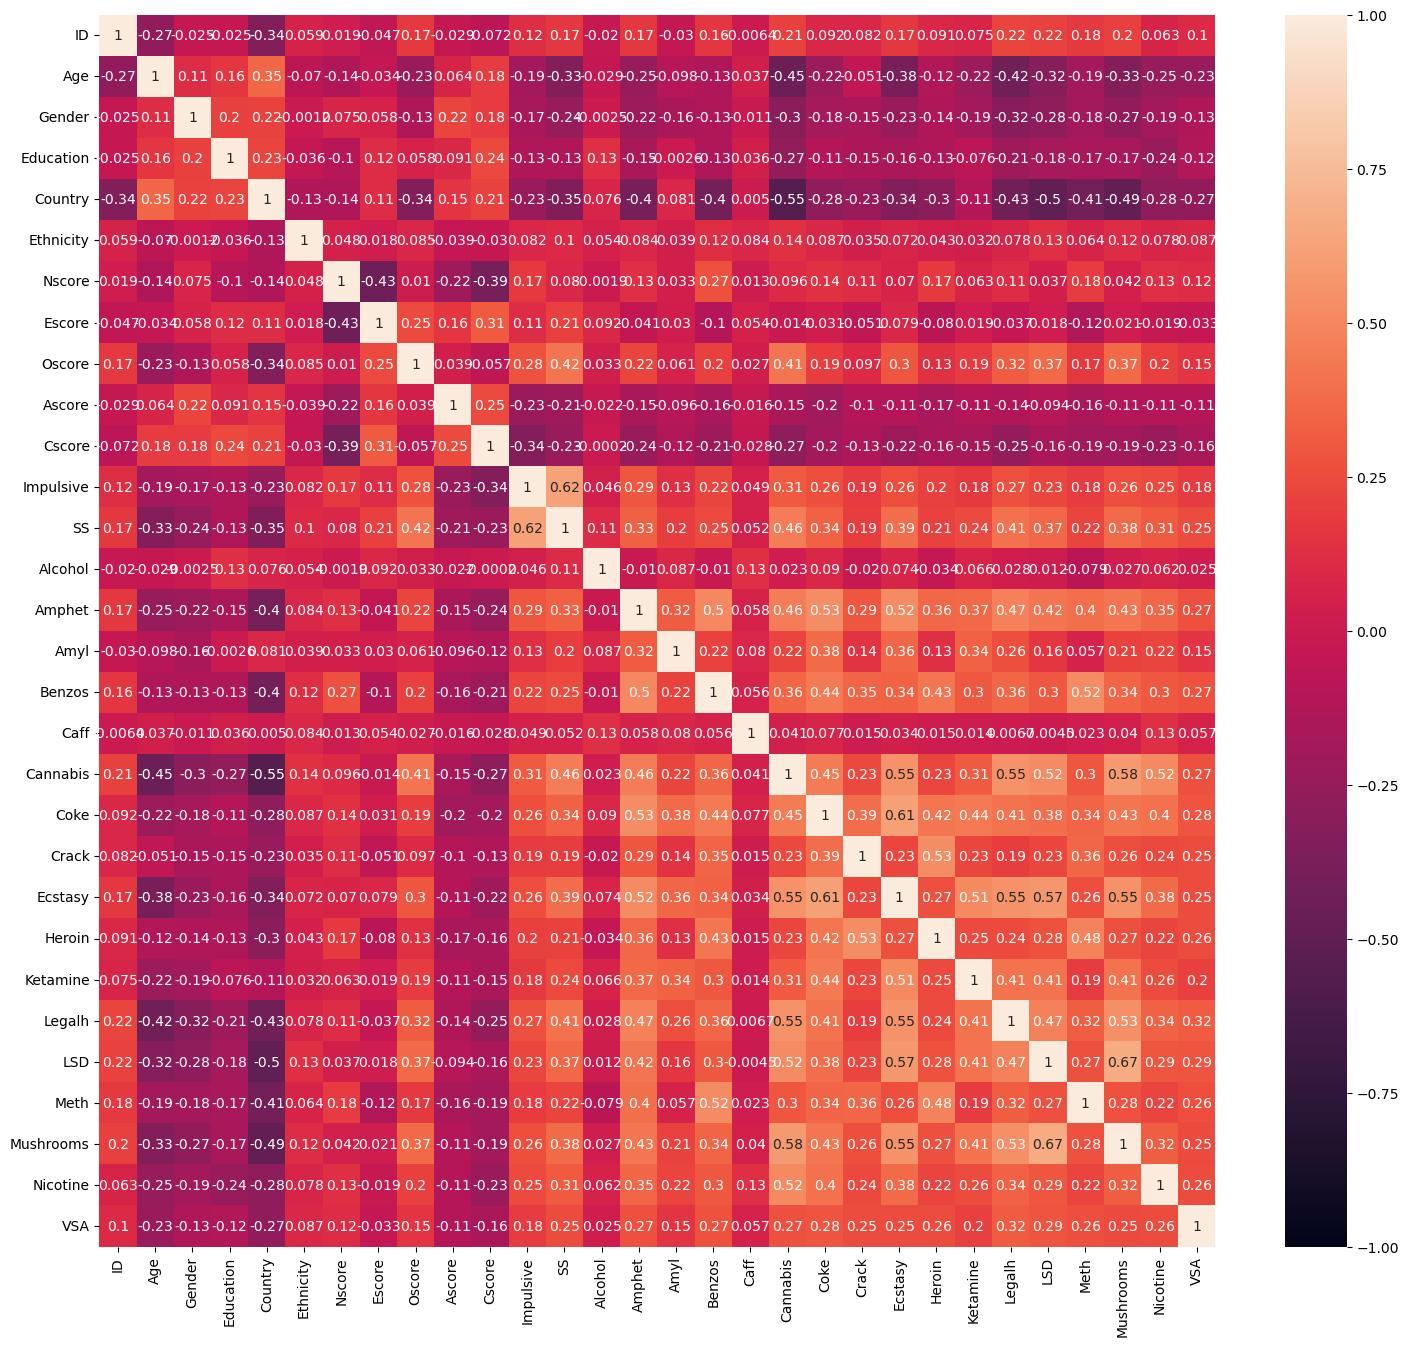

In [41]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, vmin=-1)


In [42]:
df['Nicotine'].describe()

count    1885.000000
mean        3.200531
std         2.413932
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max         6.000000
Name: Nicotine, dtype: float64

In [43]:
df['Alcohol'].describe()

count    1885.000000
mean        4.635013
std         1.331253
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: Alcohol, dtype: float64

# Train/Test Split
Data is split between all the features/characteristcs and the Nicotine column. This will allow the analysis to better understand and find patterns that potentially yield higher cases of nicotine consumption.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from time import time

In [45]:
X = df.drop(["Nicotine"], axis=1)
y = df['Nicotine']

In [46]:
X

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,3,0,4,0,2,0,2,3,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,1,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,2,0,0,0,2,0,0,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,1,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,0,0,3,3,0,0,5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,0,0,2,0,0,3,5,4,4,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,4,0,2,0,2,0,2,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,0,0,3,0,0,3,3,0,3,0


In [47]:
y = y.apply(lambda x: True if x!=0 else False)
y

0        True
1        True
2       False
3        True
4        True
        ...  
1880    False
1881     True
1882     True
1883     True
1884     True
Name: Nicotine, Length: 1885, dtype: bool

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Logistic Regression**

A baseline logistic regression model is created to compare with other models. This baseline provides a better comparison of accuracy and training time between other models

In [49]:
# create a baseline model for LR
logr = LogisticRegression()
start = time()
logr.fit(X_train, y_train)
stop = time()

logr_time = stop - start
logr_training_score = logr.score(X_train, y_train)
logr_test_score = logr.score(X_test, y_test)

print("Training time: " + str(logr_time))
print("logistic regression score on training data: " + str(logr_training_score))
print("logistic regression score on testing data: " + str(logr_test_score))

Training time: 0.02101922035217285
logistic regression score on training data: 0.8280254777070064
logistic regression score on testing data: 0.7796610169491526


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K Nearest Neighbors**

Creating a KNN model to compare with the baseline logistic regression. This model has no parameters

In [50]:
# create a knn model to compare
knn = KNeighborsClassifier()
start = time()
knn.fit(X_train, y_train)
stop = time()

knn_time = stop - start
knn_training_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

print("Training time: " + str(knn_time))
print("knn score on training data: " + str(knn_training_score))
print("knn score on testing data: " + str(knn_test_score))

Training time: 0.002001523971557617
knn score on training data: 0.8230714791224345
knn score on testing data: 0.739406779661017


**Decision Tree**

Creating a decision tree model to compare with the baseline logistic regression. This model has no parameters

In [51]:
# creating a decision tree classifier to compare
tree = DecisionTreeClassifier()
start = time()
tree.fit(X_train, y_train)
stop = time()

tree_time = stop - start
tree_training_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)

print("Training time: " + str(tree_time))
print("tree score on training data: " + str(tree_training_score))
print("tree score on testing data: " + str(tree_test_score))

Training time: 0.015013456344604492
tree score on training data: 1.0
tree score on testing data: 0.7203389830508474


**SVM**

Creating a SVM model to compare with the baseline logistic regression. This model has no parameters

In [52]:
# create a SVM model to compare
svc = svm.SVC(probability=True)
start = time()
svc.fit(X_train, y_train)
stop = time()

svc_time = stop - start
svc_training_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print("Training time: " + str(svc_time))
print("svc score on training data: " + str(svc_training_score))
print("svc score on testing data: " + str(svc_test_score))

Training time: 0.1881711483001709
svc score on training data: 0.7770700636942676
svc score on testing data: 0.760593220338983


In [53]:
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', "SVM Model"],
            'Train Time': [logr_time, knn_time, tree_time, svc_time],
            'Train Accuracy': [logr_training_score, knn_training_score, tree_training_score, svc_training_score],
           'Test Accuracy': [logr_test_score, knn_test_score, tree_test_score, svc_test_score],
          }
results_df = pd.DataFrame(res_dict)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.021019,0.828025,0.779661
1,KNN,0.002002,0.823071,0.739407
2,Decision Tree,0.015013,1.000000,0.720339
3,SVM Model,0.188171,0.777070,0.760593


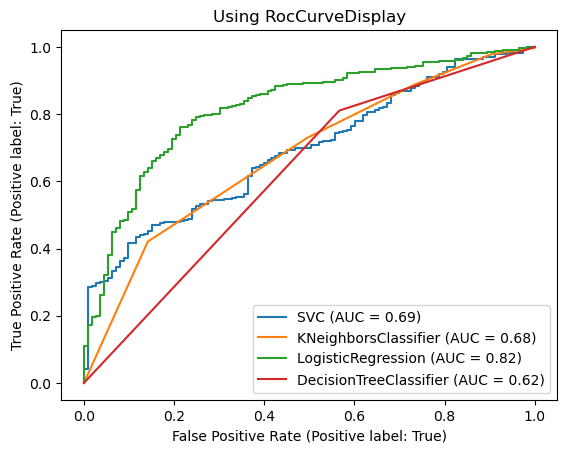

In [54]:
# Comparing values with another performance metric

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=svc_disp.ax_)
logr_disp = RocCurveDisplay.from_estimator(logr, X_test, y_test, ax=svc_disp.ax_)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=svc_disp.ax_)
plt.title('Using RocCurveDisplay')
plt.legend();

In [55]:
svc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
tree_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
logr_auc = roc_auc_score(y_test, logr.predict_proba(X_test)[:,1])

print("svc auc score on testing data: " + str(svc_auc))
print("tree auc score on testing data: " + str(tree_auc))
print("knn auc score on testing data: " + str(knn_auc))
print("logr auc score on testing data: " + str(logr_auc))

svc auc score on testing data: 0.6915719673626347
tree auc score on testing data: 0.6221066384006705
knn auc score on testing data: 0.6797643404737841
logr auc score on testing data: 0.8197549732541228


**Baseline Model Comparison**

Upon comparing all the base models, KNN had the least training time while the baseline logistic regression model yielded the highest test accuracy. Comparing the AUC scoring, SVM had the highest score.

# Improving the Model / Adjusting Hyperparameters
With the baselines completed, these models will have their hyperparameters tested and analyzed to create the best performing classifier. Each model will undergo a grid search cross validation to prevent overfitting and ensure model accuracy.

In [56]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [57]:
# Using logistic regression as it has one of the highest testing accuracies
# Showcasing the feature importance with its baseline model
import numpy as np

importance = logr.coef_[0]
logr_importance = pd.DataFrame({"Feature": X.columns, 'Importance': importance})
logr_importance = logr_importance.set_index("Feature")
logr_importance = logr_importance.sort_values('Importance', ascending =  False)

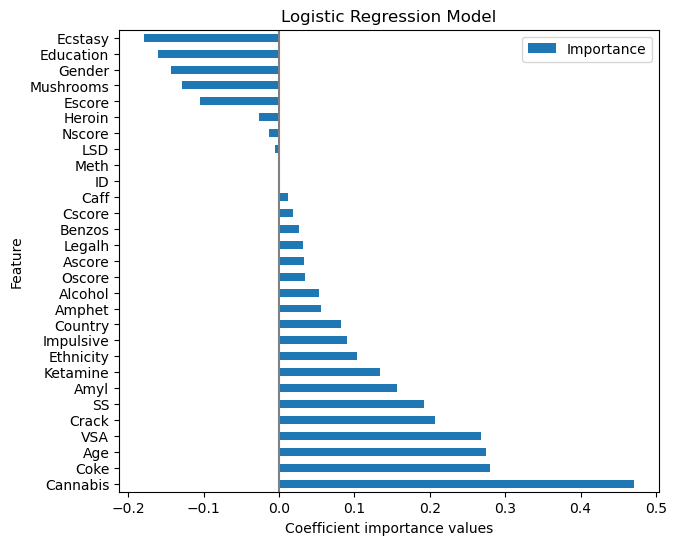

In [58]:
# plotting feature importance as a bar chart
logr_importance.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance values")
plt.subplots_adjust(left=0.3)

In [59]:
# hyperparameter tuning for logistic regression 

# defining models and its parameters
logr_new_model = LogisticRegression()
params = {'solver': ['newton-cg','liblinear', 'lbfgs','sag','saga'],
         'penalty': ['l2','l1',"elasticnet"],
         'C' : [ 100, 10, 1.0, 0.1, 0.01, 0.001]}

# defining grid search paramaters
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=42)
logr_search = GridSearchCV(estimator=logr_new_model, param_grid=params, n_jobs=-1, cv=cross_validation, scoring='accuracy')
logr_result = logr_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (logr_result.best_score_, logr_result.best_params_))
means = logr_result.cv_results_['mean_test_score']
stds = logr_result.cv_results_['std_test_score']
params = logr_result.cv_results_['params']

Best: 0.812261 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7200 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(

**Hyperparameter tuned Logistic Regression**

Best Params with 0.812 accuracy: 
- C: 10
- penalty: l2
- solver lbfgs

In [61]:
# optimizing svc model

# defining models and its parameters
svc_new_model = SVC(max_iter = 1000)
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],
         'C' : [100, 10, 1.0, 0.1, 0.01]}

# defining grid search paramaters
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=42)
svc_search = GridSearchCV(estimator=svc_new_model, param_grid=params, n_jobs=-1, cv = cross_validation, scoring='accuracy' )
svc_result = svc_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (svc_result.best_score_, svc_result.best_params_))
means = svc_result.cv_results_['mean_test_score']
stds = svc_result.cv_results_['std_test_score']
params = svc_result.cv_results_['params']    

Best: 0.775776 using {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Hyperparameter tuned SVM**

Best Params with 0.776 accuracy: 
- C: 100
- gamma: 0.1
- kernel: rbf

In [62]:
# optimizing decision tree model

# defining models and its parameters
tree_new_model = DecisionTreeClassifier()
params = {'max_depth': [2,3,5,10,15,20],
         'min_samples_leaf': [1,2,3,4,5,10,20,40],
         'criterion' : ['gini', 'entropy']}

# defining grid search paramaters
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=42)
tree_search = GridSearchCV(estimator=tree_new_model, param_grid= params, n_jobs=-1, cv=cross_validation, scoring='accuracy')
tree_result = tree_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (tree_result.best_score_, tree_result.best_params_))
means = tree_result.cv_results_['mean_test_score']
stds = tree_result.cv_results_['std_test_score']
params = tree_result.cv_results_['params']    
    


Best: 0.834472 using {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}


**Hyperparameter tuned Decision Tree**

Best Params with 0.834 accuracy: 
- criterion: gini
- max_depth: 2
- min_sample_leaf: 20

In [63]:
# optimizing knn model

# defining models and its parameters
knn_new_model = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 7),
         'weights': ['uniform', 'distance'],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'p' : [1,2]}

# defining grid search paramaters
# knn_grid = dict(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm, p = p)
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=15, random_state=42)
knn_search = GridSearchCV(estimator=knn_new_model, param_grid= params, n_jobs=-1, cv=cross_validation, scoring='accuracy')
knn_result = knn_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (knn_result.best_score_, knn_result.best_params_))
means = knn_result.cv_results_['mean_test_score']
stds = knn_result.cv_results_['std_test_score']
params = knn_result.cv_results_['params']    
    

Best: 0.751019 using {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


**Hyperparameter tuned KNN**

Best Params with 0.751 accuracy: 
- algorithm: auto
- n_neighbors: 6
- p: 1
- weights: distance

# Running the Tuned Models
With hypertuned models defined, it is now time to run the models on the testing data to see which classifier results with the higest test accuracy.

In [68]:
tuned_LR = LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs')

start = time()
tuned_LR.fit(X_train, y_train)
stop = time()

tuned_LR_time = stop - start
tuned_LR_training_score = tuned_LR.score(X_train, y_train)
tuned_LR_test_score = tuned_LR.score(X_test, y_test)

print("Training time: " + str(tuned_LR_time))
print("logistic regression score on training data: " + str(tuned_LR_training_score))
print("logistic regression score on testing data: " + str(tuned_LR_test_score))
                              

Training time: 0.017015695571899414
logistic regression score on training data: 0.8273177636234961
logistic regression score on testing data: 0.7796610169491526


C:\Users\lcs_n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
tuned_SVM = SVC(gamma = 1.0, kernel = 'rbf')

start = time()
tuned_SVM.fit(X_train, y_train)
stop = time()

tuned_SVM_time = stop - start
tuned_SVM_training_score = tuned_SVM.score(X_train, y_train)
tuned_SVM_test_score = tuned_SVM.score(X_test, y_test)

print("Training time: " + str(tuned_SVM_time))
print("SVM score on training data: " + str(tuned_SVM_training_score))
print("SVM score on testing data: " + str(tuned_SVM_test_score))
                              



Training time: 0.14313006401062012
SVM score on training data: 1.0
SVM score on testing data: 0.760593220338983


In [70]:
tuned_DT = DecisionTreeClassifier(criterion =  'entropy', max_depth = 3, min_samples_leaf = 20)

start = time()
tuned_DT.fit(X_train, y_train)
stop = time()

tuned_DT_time = stop - start
tuned_DT_training_score = tuned_DT.score(X_train, y_train)
tuned_DT_test_score = tuned_DT.score(X_test, y_test)

print("Training time: " + str(tuned_DT_time))
print("Deciosion Tree score on training data: " + str(tuned_DT_training_score))
print("Decision Tree score on testing data: " + str(tuned_DT_test_score))
                              

Training time: 0.004004001617431641
Deciosion Tree score on training data: 0.8492569002123143
Decision Tree score on testing data: 0.8177966101694916


In [71]:
tuned_KNN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 6, p = 1, weights = 'uniform')

start = time()
tuned_KNN.fit(X_train, y_train)
stop = time()

tuned_KNN_time = stop - start
tuned_KNN_training_score = tuned_KNN.score(X_train, y_train)
tuned_KNN_test_score = tuned_KNN.score(X_test, y_test)

print("Training time: " + str(tuned_KNN_time))
print("KNN score on training data: " + str(tuned_KNN_training_score))
print("KNN score on testing data: " + str(tuned_KNN_test_score))
                              

Training time: 0.006005525588989258
KNN score on training data: 0.8145789101203114
KNN score on testing data: 0.7182203389830508


# Comparing Results
Each model has been used on test data, the model with the highest accuracy and AUC score will be the best to determine what features are highly correlated with nicotine consumption.

In [72]:
tuned_dict = {'Model': ['Tuned Logistic Regression', 'Tuned KNN', 'Tuned Decision Tree', "Tuned SVM Model"],
            'Train Time': [tuned_LR_time, tuned_KNN_time, tuned_DT_time, tuned_SVM_time],
            'Train Accuracy': [tuned_LR_training_score, tuned_KNN_training_score, tuned_DT_training_score, tuned_SVM_training_score],
           'Test Accuracy': [logr_test_score, tuned_KNN_test_score, tuned_DT_test_score, tuned_SVM_test_score],
          }
tuned_df = pd.DataFrame(tuned_dict)
tuned_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Tuned Logistic Regression,0.017016,0.827318,0.779661
1,Tuned KNN,0.006006,0.814579,0.718220
2,Tuned Decision Tree,0.004004,0.849257,0.817797
3,Tuned SVM Model,0.143130,1.000000,0.760593


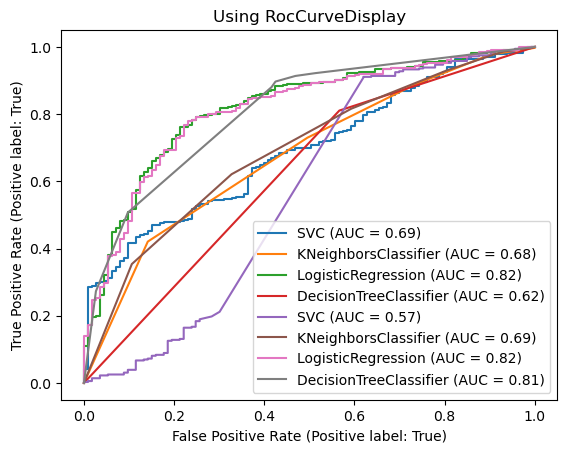

In [73]:
#Comparing ROC and AUC values between baseline models and optimized models

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=svc_disp.ax_)
logr_disp = RocCurveDisplay.from_estimator(logr, X_test, y_test, ax=svc_disp.ax_)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=svc_disp.ax_)

svc2_disp = RocCurveDisplay.from_estimator(tuned_SVM, X_test, y_test, ax=svc_disp.ax_)
knn2_disp = RocCurveDisplay.from_estimator(tuned_KNN, X_test, y_test, ax=svc_disp.ax_)
logr2_disp = RocCurveDisplay.from_estimator(tuned_LR, X_test, y_test, ax=svc_disp.ax_)
tree2_disp = RocCurveDisplay.from_estimator(tuned_DT, X_test, y_test, ax=svc_disp.ax_)
plt.title('Using RocCurveDisplay')
plt.legend();

# Determining Feature Importance
The models that yielded the highest accuracy were the tuned logistic regression model and the decision tree model. These two classifier will be used to showcase the feature importance levels within the dataset. This better explains and highlights what features (drugs or characteristics) influence the consumption of nicotine.

In [74]:
# Tuned Logistic Regression Feature Importance

tuned_logr_importance = tuned_LR.coef_[0]
tuned_logr_df = pd.DataFrame({"Feature": X.columns, 'Importance': tuned_logr_importance})
tuned_logr_df = tuned_logr_df.set_index("Feature")
tuned_logr_df = tuned_logr_df.sort_values('Importance', ascending =  False)
tuned_logr_df

,Importance
Feature,
Cannabis,0.471201
VSA,0.331071
Age,0.289435
Crack,0.268340
Coke,0.258649
SS,0.220705
Ethnicity,0.166171
Ketamine,0.145129
Amyl,0.128988


Text(0.5, 0, 'Coefficient importance values')

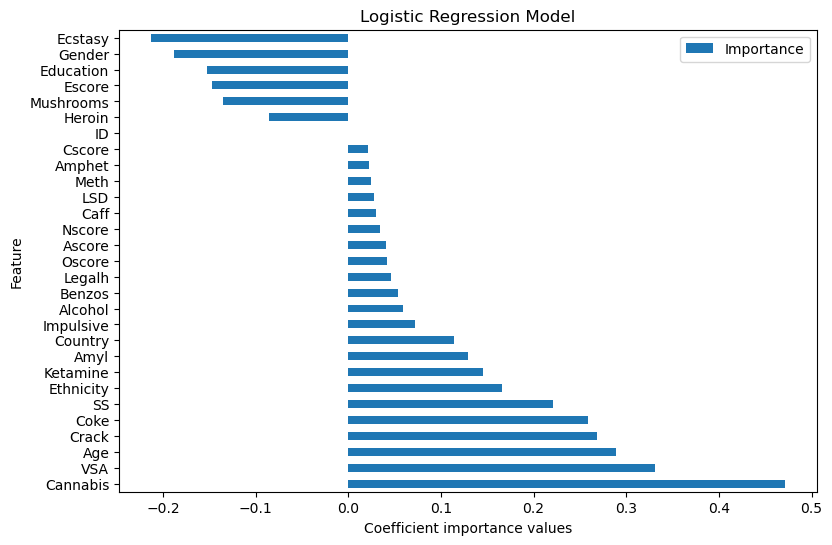

In [75]:
# plotting feature importance as a bar chart
tuned_logr_df.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.xlabel("Coefficient importance values")

In [76]:
# Tuned Decision Tree Feature Importance

tuned_DT_importance = pd.DataFrame({"Feature": X.columns, "Importance": tuned_DT.feature_importances_})
tuned_DT_importance = tuned_DT_importance.set_index("Feature")
tuned_DT_importance = tuned_DT_importance.sort_values('Importance', ascending =  False)
tuned_DT_importance

,Importance
Feature,
Cannabis,0.797565
VSA,0.070463
Coke,0.041331
Escore,0.035443
Age,0.032623
Education,0.022576
Benzos,0.000000
Mushrooms,0.000000
Meth,0.000000


Text(0.5, 0, 'Coefficient importance values')

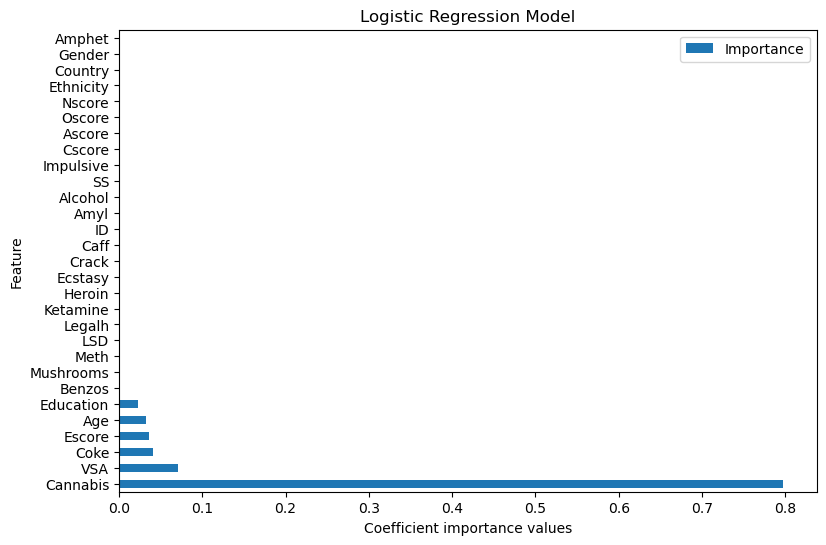

In [77]:
tuned_DT_importance.plot.barh(figsize=(9, 6))
plt.title("Logistic Regression Model")
plt.xlabel("Coefficient importance values")

[Text(0.4583333333333333, 0.875, 'Cannabis <= 0.5\nentropy = 0.765\nsamples = 1413\nvalue = [315, 1098]\nclass = Yes'),
 Text(0.25, 0.625, 'Age <= 1.458\nentropy = 0.945\nsamples = 311\nvalue = [198, 113]\nclass = No'),
 Text(0.16666666666666666, 0.375, 'Education <= -1.588\nentropy = 0.91\nsamples = 274\nvalue = [185, 89]\nclass = No'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.946\nsamples = 22\nvalue = [8, 14]\nclass = Yes'),
 Text(0.25, 0.125, 'entropy = 0.878\nsamples = 252\nvalue = [177, 75]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.935\nsamples = 37\nvalue = [13, 24]\nclass = Yes'),
 Text(0.6666666666666666, 0.625, 'VSA <= 0.5\nentropy = 0.488\nsamples = 1102\nvalue = [117, 985]\nclass = Yes'),
 Text(0.5, 0.375, 'Coke <= 1.5\nentropy = 0.572\nsamples = 791\nvalue = [107, 684]\nclass = Yes'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.67\nsamples = 479\nvalue = [84, 395]\nclass = Yes'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.38\nsamples = 312\nva

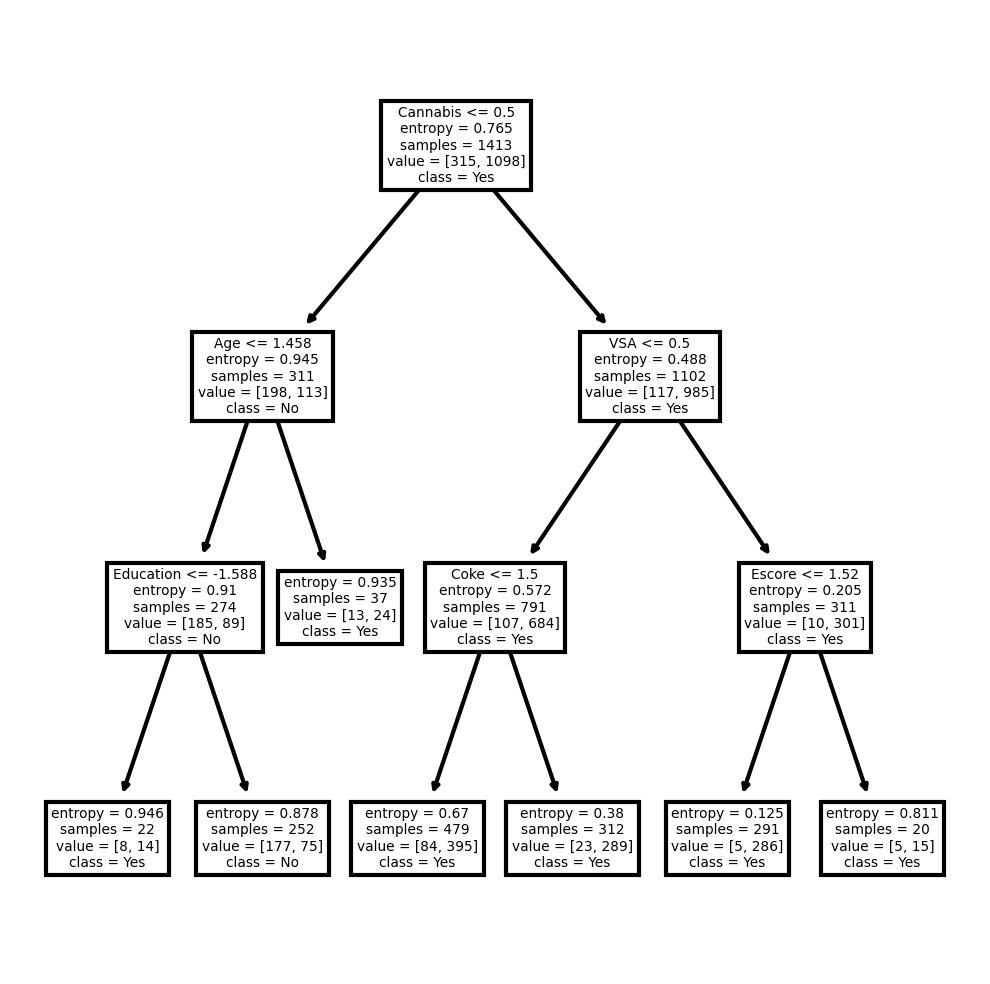

In [78]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(tuned_DT, feature_names = X.columns, class_names = ["No", "Yes"])

# Conclusion

Fine tuning the machine learning classifiers yielded higher accuracy scores in testing data and ROC/AUC scores. Without fine tuning, logistic regression yielded the higest accuracy. After, decision tree classifiers yielded the highest score with an increase by 0.08 in test data score and 0.18 in ROC/AUC scores. Logistic regression barely showed any difference in scores before and after fine tuning, whereas SVM had an increase in scoring on the test data, but a drop in score for the ROC/AUC score.

The decision tree classifier and logistic regression classifier both yielded the highest scores in terms of performance metrics. Feature extraction on these two models showcased similar results. Cannabis was the leading factor in signifcant influence on whether or not a user smoked nicotine. This makes sense as both drugs are a type of smoking habit, whereas many others are consumption or needle based. Decision trees showcased that Amphet and Age were the next two leading factors on whether an individual uses nicotine. Logistic regression had cocaine and VSA as its following leading factors.

The result of this machine learning analysis can help officials and healthcare workers develop more precautionary steps to prevent nicotine consumption. Knowing the strong influence factor that cannabis has could significantly enhance our understanding of the complex interactions between substance use and public health. By leveraging the insights gained from this analysis, policymakers can tailor targeted interventions and educational campaigns to address the specific challenges posed by cannabis in the context of nicotine addiction.

Furthermore, the identification of key patterns and risk factors through machine learning can contribute to the formulation of evidence-based strategies aimed at reducing the prevalence of nicotine consumption. This comprehensive approach involves not only addressing individual substance use but also considering the interconnected dynamics between different substances.